# Import Libraries

In [3]:
import pandas as pd
import numpy as np
from scipy import stats
from datetime import datetime
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline

# Import Data

In [59]:
filename = 'Prometidas vs Facturadas.csv'
df = pd.read_csv(filename, index_col=[0], 
                 date_parser=lambda x: datetime.strptime(x, "%m/%d/%Y %H:%M"))
df.head()

,Prometidas,Facturadas
Timestamp,,
2010-01-01 01:15:00,0,1
2010-01-01 01:30:00,0,0
2010-01-01 01:45:00,0,0
2010-01-01 02:00:00,6,1
2010-01-01 02:15:00,133,305


# Plot Data

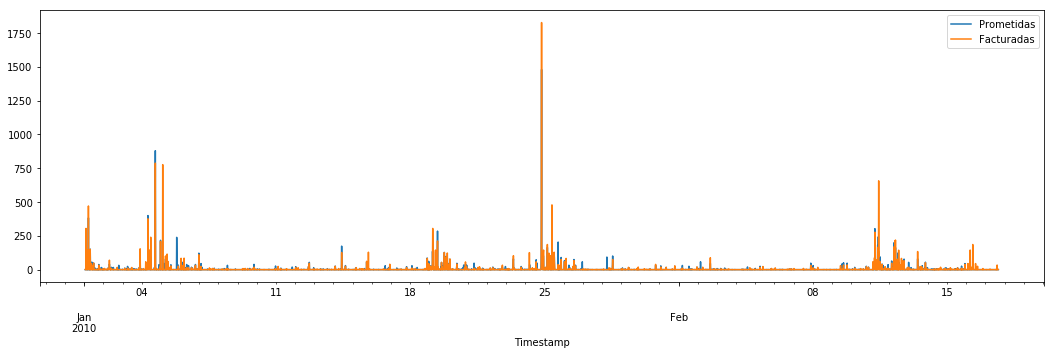

In [37]:
df.plot(figsize=(18,5))

# Check for missing data

In [38]:
df.isnull().values.any()

False

# Distribution of data

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6103f5bc88>,
      dtype=object)

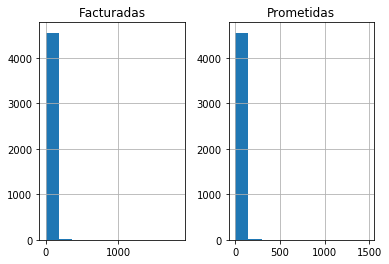

In [39]:
df.hist()

# Remove outliers

In [40]:
std_dev = 3
df_new = df[(np.abs(stats.zscore(df)) < float(std_dev)).all(axis=1)]

# Plot cleaned data

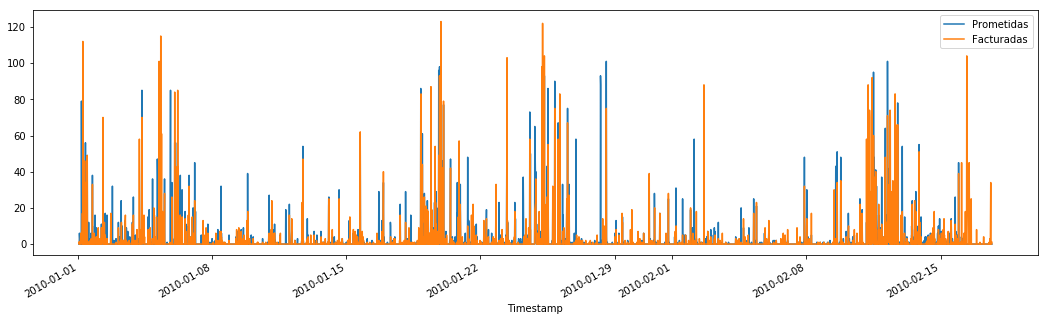

In [41]:
df_new.plot(figsize=(18,5))

# Validate linear relationship

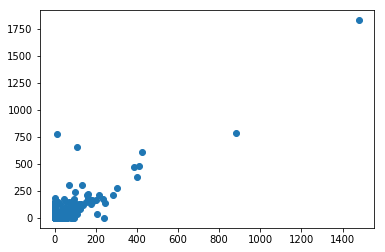

In [61]:
plt.scatter(df['Prometidas'], df['Facturadas'])

# Plot a day picked at random

Monday


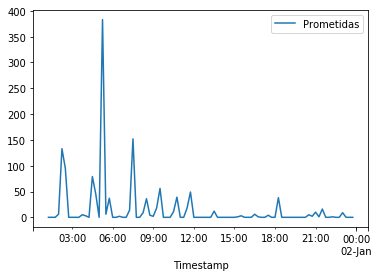

In [53]:
df.loc['2010-01-01', ['Prometidas']].plot()

# Prints the day
print(df.loc['2010-02-01'].index.day_name()[0])

Monday


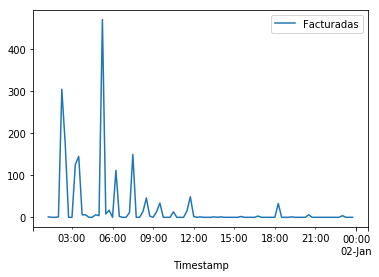

In [54]:
df.loc['2010-01-01', ['Facturadas']].plot()
print(df.loc['2010-02-01'].index.day_name()[0])

# Fit Data to Linear Regression

In [56]:
X = pd.DataFrame(df['Prometidas'])
y = pd.DataFrame(df['Facturadas'])

model = LinearRegression()
scores = []
kfold = KFold(n_splits=3, shuffle=True, random_state=42)
for i, (train, test) in enumerate(kfold.split(X, y)):
    model.fit(X.iloc[train,:], y.iloc[train,:])
    score = model.score(X.iloc[test,:], y.iloc[test,:])
    scores.append(score)

print(scores)

[0.9167062664026668, 0.6693931982572362, 0.38107685613368725]


# Add time of day

In [57]:
X = pd.DataFrame(df['Prometidas'])

var = 'tod'
X[var] = X.index.hour

# drop_first = True removes multi-collinearity
add_var = pd.get_dummies(X[var], prefix=var, drop_first=True)

# Add all the columns to the model data
X = X.join(add_var)

# Drop the original column that was expanded
X.drop(columns=[var], inplace=True)

X.head()

,Prometidas,tod_1,tod_2,tod_3,tod_4,tod_5,tod_6,tod_7,tod_8,tod_9,...,tod_14,tod_15,tod_16,tod_17,tod_18,tod_19,tod_20,tod_21,tod_22,tod_23
Timestamp,,,,,,,,,,,,,,,,,,,,,
2010-01-01 01:15:00,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2010-01-01 01:30:00,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2010-01-01 01:45:00,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2010-01-01 02:00:00,6,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2010-01-01 02:15:00,133,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Fit Data to Multiple Regression

In [58]:
y = pd.DataFrame(df['Facturadas'])

model = LinearRegression()
scores = []
kfold = KFold(n_splits=3, shuffle=True, random_state=42)
for i, (train, test) in enumerate(kfold.split(X, y)):
    model.fit(X.iloc[train,:], y.iloc[train,:])
    scores.append(model.score(X.iloc[test,:], y.iloc[test,:]))

print(scores)

[0.9150350254532037, 0.657270555789474, 0.38002649040667197]
